# CS6140: Machine Learning - Prof. Ahmad Uzair

### Assignment 2: Linear Regression

# Question 1 <div style="text-align: right"> [10 pts] </div>

### 1. Import Libraries (keep them here for clarity) <div style="text-align: right"> [0.25 pts] </div>

In [191]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import accuracy_score, classification_report, f1_score, mean_squared_error, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

### 2. Load the dataset <div style="text-align: right"> [0.5 pts] </div>

#### Use : 'boston housing' dataset from sklearn

In [93]:
# data url 
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# load data
raw_df = pd.read_csv(data_url, sep = "\s+", skiprows = 22, header = None)

raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [94]:
# transform raw data to horizontally stack the arrays 
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

target = raw_df.values[1::2, 2]

print(data.data.shape)

(506, 13)


### 3.  Seggregate data in variables <div style="text-align: right"> [0.25 pts] </div>

In [95]:
X =  data
y =  target

### 4.  Convert in Pandas Dataframe and show as below <div style="text-align: right"> [0.25 pts] </div>

In [96]:
# add column names to the dataframe
attributes = ["CRIM","ZN","INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD" , "TAX", "PTRATIO" ,"B", "LSTAT"]

df = pd.DataFrame(data, columns=attributes)

df['PRICE'] = target

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 5.  Split the dataset into training and testing sets <div style="text-align: right"> [0.5 pts] </div>

#### Note : test size --> 20% and random state ---> 111

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 111)

### 6. Explain the differences between Linear /  Ridge regression <div style="text-align: right"> [1 pts] </div>

#### 6.1. Magnitude of Coefficients:

The coefficients in Linear regression are usually identified through the least squares method which entails finding the values that minimize the sum sqaured residuals, however, when there are highly correlated variables, it may produce large coefficients. Whereas, Ridge regression adds the regularization term for large coefficients, leading to smaller and balanced coefficient values. Hence, Ridge is preferred in multicollinearity cases as it stabilizes and regularize the model by preventing large cofficients. 

#### 6.2. Fitting (Over/Under):

In Linear regression, the model is prone to overfitting, and there is no mechanism to control overfitting especially in the case of multicollinearity. Whereas, Ridge regression, with its regularization term, is more robust against overfitting by discouraging the model from relying heavily on a single feature or subsets. 

#### 6.3. Feature Importance:

Linear regression models assigns importance to features solely based on their magnitude of coefficients, that is, larger coefficients suggests stronger influence and vice-versa. Due to the lack of any mechanism to prevent overfitting or handle multicollinearity, model tends to assign larger coefficients even to irrelevant features. On the other hand, Ridge regression with its regularization term, shrinks the coefficients towards zero, especially for less relevant features. Hence, creating a robust, balanced, and distributed set of feature importance. 

#### 6.4. Model Complexity:

As discussed earlier, Linear regression and Ridge regerssion models differ in terms of model complexity due to the presence of regularization in Ridge regression. Without regularization in Linear regression, model may become complex due to large number of features and their magnitude of coefficients. Whereas, Ridge regression reduces the model's complexity by incorporating regularization term and become more robust and less prone to overfitting. 

### 7. Implement Linear Regression - sklearn <div style="text-align: right"> [1 pts] </div>

In [7]:
# check if there are any null values in the data
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [8]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### 8. Implement Ridge Regression with lambda = 1.0 - sklearn <div style="text-align: right"> [1 pts] </div>

In [9]:
r = Ridge(alpha = 1.0)
r.fit(X_train, y_train)

Ridge()

### 9. Evaluate the models (M.S.E) <div style="text-align: right"> [0.5 pts] </div>

In [10]:
# predict linear model 
y_pred_lm = lm.predict(X_test)

# predict ridge model 
y_pred_r = r.predict(X_test)

print("Linear Regression Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred_lm)))
print("Ridge Regression Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred_r)))

Linear Regression Mean Squared Error: 23.066428424068427
Ridge Regression Mean Squared Error: 23.63737071708968


### 10. Plot the coefficients of Linear and Ridge Regression models <div style="text-align: right"> [0.5 pts] </div>

In [11]:
# print linear model coefficients
lm.coef_

array([-7.48337753e-02,  5.14752164e-02,  3.97589082e-02,  2.45234005e+00,
       -1.63149112e+01,  3.80836814e+00, -8.76931962e-03, -1.43470363e+00,
        2.74837393e-01, -1.20744867e-02, -9.10116591e-01,  1.08478530e-02,
       -5.14496805e-01])

In [12]:
# print ridge model coefficients
r.coef_

array([-6.96475710e-02,  5.09485446e-02,  7.80368725e-03,  2.31848480e+00,
       -8.79930657e+00,  3.84944441e+00, -1.52089993e-02, -1.31130539e+00,
        2.53330601e-01, -1.24731461e-02, -8.38018136e-01,  1.13927057e-02,
       -5.23297278e-01])

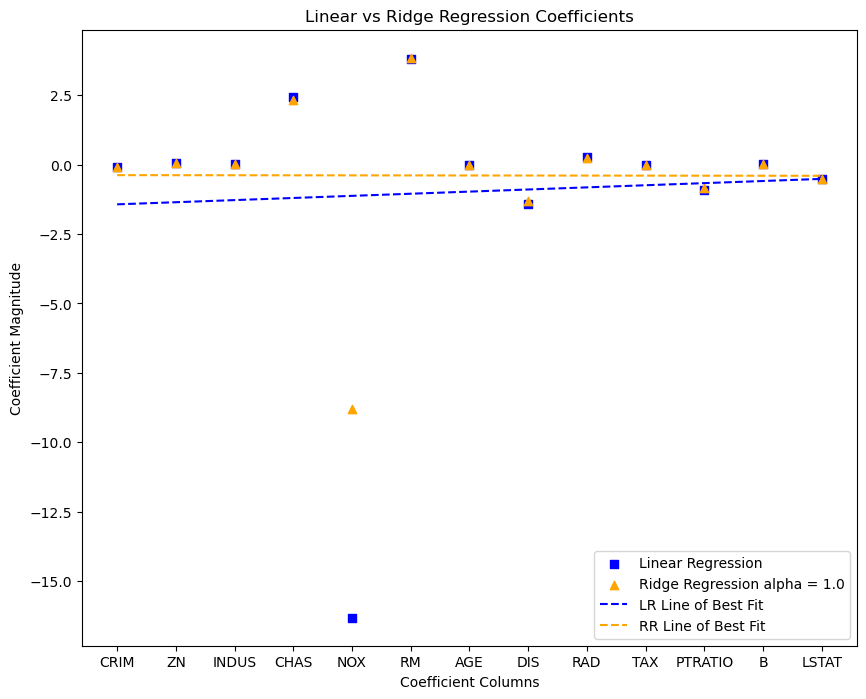

In [13]:
# define figure size
plt.figure(figsize = (10, 8))

# set title 
plt.title("Linear vs Ridge Regression Coefficients")

# plot linear and ridge coefficients
plt.scatter(attributes, lm.coef_, marker = 's', color = 'blue', label = 'Linear Regression')
plt.scatter(attributes, r.coef_, marker = '^', color = 'orange', label = 'Ridge Regression alpha = 1.0')

# find best fit line for linear and ridge
x = range(1, len(attributes) + 1)

a, b = np.polyfit(x, lm.coef_, 1)
plt.plot(attributes, a*x+b, linestyle='--', color = 'blue', label = "LR Line of Best Fit")
a, b = np.polyfit(x, r.coef_, 1)
plt.plot(attributes, a*x+b, linestyle='--', color='orange', label = "RR Line of Best Fit")

# set legends 
plt.legend(loc = 'lower right')

# set x and y labels 
plt.xlabel("Coefficient Columns")
plt.ylabel("Coefficient Magnitude")

plt.show()

### 11. What are the 'N' most important features in our data according to your graph? <div style="text-align: right"> [0.25 pts] </div>

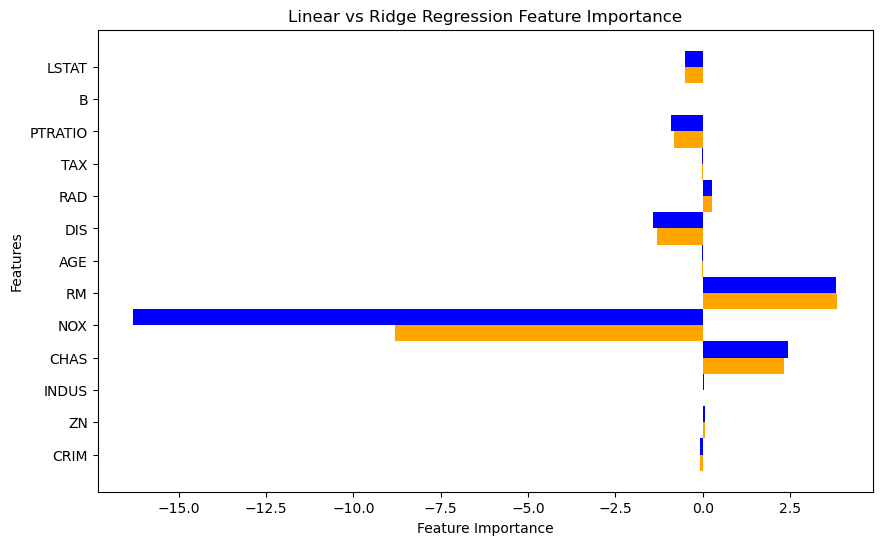

In [25]:
# plot feature importance individually for linear and ridge
plt.figure(figsize = (10, 6))
plt.barh(attributes, lm.coef_, color = 'blue', height = 0.5, align = 'edge')
plt.barh(attributes, r.coef_, color = 'orange', height = -0.5, align = 'edge')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Linear vs Ridge Regression Feature Importance")
plt.show()

In [57]:
# combine linear and ridge coefficients to find N features
feature_imp = np.add(np.absolute(lm.coef_), np.absolute(r.coef_))

# create a dictionary for each attribute and its value
feature_imp_map = dict()

for i in range(len(attributes)):
    feature_imp_map[attributes[i]] = feature_imp[i]

# sort them in descending order
sorted_features = sorted(feature_imp_map.items(), key=lambda x: x[1], reverse=True)

In [105]:
print("Top 6 features: {}", sorted_features[:6])

Top 6 features: {} [('NOX', 25.114217777777675), ('RM', 7.6578125474445535), ('CHAS', 4.770824855338438), ('DIS', 2.746009020047641), ('PTRATIO', 1.7481347269755527), ('LSTAT', 1.0377940834364077)]


### 12. Remove All other features and keep your selected 'N' features <div style="text-align: right"> [0.25 pts] </div>

In [111]:
# get top 6 attributes names to filter out the df
selected_attributes = []

for i, tuple in enumerate(sorted_features[:6]):
    selected_attributes.append(sorted_features[i][0])

df_n = df[selected_attributes]
df_n

,NOX,RM,CHAS,DIS,PTRATIO,LSTAT
0,0.538,6.575,0.0,4.0900,15.3,4.98
1,0.469,6.421,0.0,4.9671,17.8,9.14
2,0.469,7.185,0.0,4.9671,17.8,4.03
3,0.458,6.998,0.0,6.0622,18.7,2.94
4,0.458,7.147,0.0,6.0622,18.7,5.33
...,...,...,...,...,...,...
501,0.573,6.593,0.0,2.4786,21.0,9.67
502,0.573,6.120,0.0,2.2875,21.0,9.08
503,0.573,6.976,0.0,2.1675,21.0,5.64
504,0.573,6.794,0.0,2.3889,21.0,6.48


### 13. Re calculate the M.S.E  <div style="text-align: right"> [1.5 pts] </div>

In [112]:
# split train test
X_train, X_test, y_train, y_test = train_test_split(df_n, y, test_size = 0.20, random_state = 111)

# fit linear regression model
lm.fit(X_train, y_train)

# fit ridge regression model 
r.fit(X_train, y_train)

# predict linear model 
y_pred_lm = lm.predict(X_test)

# predict ridge model 
y_pred_r = r.predict(X_test)

print("Linear Regression Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred_lm)))
print("Ridge Regression Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred_r)))

Linear Regression Mean Squared Error: 25.211650120972138
Ridge Regression Mean Squared Error: 25.708351195059535


### 14. Re Plot the coefficients  <div style="text-align: right"> [0.25 pts] </div>

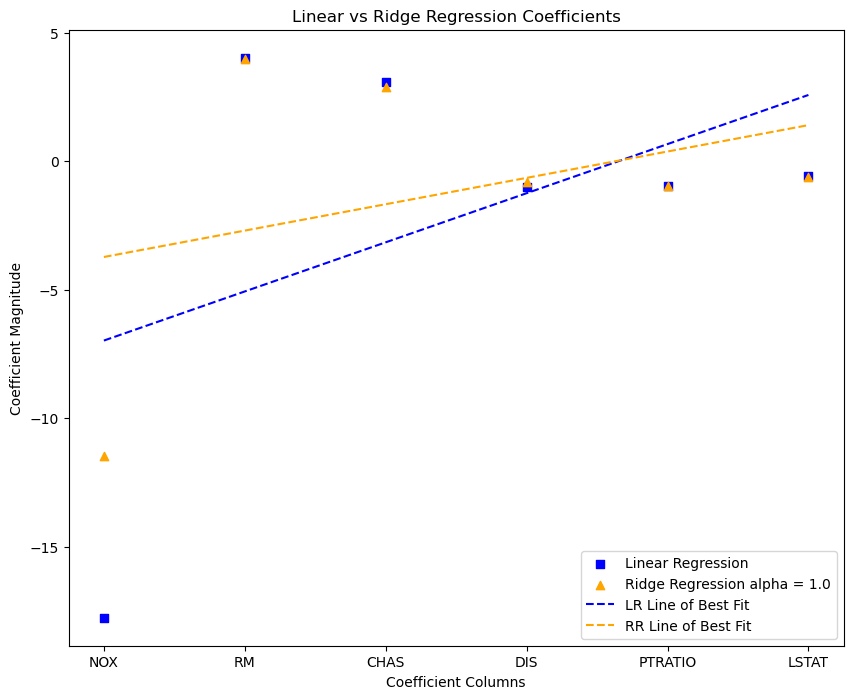

In [113]:
# define figure size
plt.figure(figsize = (10, 8))

# set title 
plt.title("Linear vs Ridge Regression Coefficients")

# plot linear and ridge coefficients
plt.scatter(selected_attributes, lm.coef_, marker = 's', color = 'blue', label = 'Linear Regression')
plt.scatter(selected_attributes, r.coef_, marker = '^', color = 'orange', label = 'Ridge Regression alpha = 1.0')

# find best fit line for linear and ridge
x = range(1, len(selected_attributes) + 1)

a, b = np.polyfit(x, lm.coef_, 1)
plt.plot(selected_attributes, a*x+b, linestyle='--', color = 'blue', label = "LR Line of Best Fit")
a, b = np.polyfit(x, r.coef_, 1)
plt.plot(selected_attributes, a*x+b, linestyle='--', color='orange', label = "RR Line of Best Fit")

# set legends 
plt.legend(loc = 'lower right')

# set x and y labels 
plt.xlabel("Coefficient Columns")
plt.ylabel("Coefficient Magnitude")

plt.show()

### 15. Do you think you picked the correct 'N' features? Explain your rationale.! <div style="text-align: right"> [0.5 pts] </div>

Yes, I believe correct 'N' features were picked because the magnitude of coefficients directly reflects the impact of each feature on the predicted outcome. As seen in the graphs above, larger coefficients suggest a stronger influence and vice-versa. 

### 16. Write About (what are they and what do they impact) <div style="text-align: right"> [0.5 pts] </div>

#### 16.1. Magnitude of Coefficients 

As discussed earlier, feature selection in Linear and Ridge regression is based on the magnitude of the coefficients. Larger coefficients are often interpreted as more important features, even though Linear model may assign larger coefficients to less relevant features. However, Ridge regression with its regularization term penalizes the magnitude of coefficients and tends to result in smaller magnitude for less important features, pushing some coefficients to close to zero. With the combination of both models coefficients, potentially resulting into a controlled and balanced approach to feature selection, hence, mitigating the issue of overfitting and handling multicollinearity effectively.

#### 16.2. Sign of Coefficients 

The sign of coefficients usually indicates the direction of the relationship between the input variable and target variable. A positive coefficient means a positive correlation and vice-versa for a negative coefficient. Even Ridge regression is directed by the sign of coefficients, but their magnitudes are constrained by the regularization term. 

### 17.Why is there any difference between the coefficients of the two (linear/ridge) models (if any)? <div style="text-align: right"> [0.5 pts] </div>

The difference between the coefficients of Linear regression and Ridge regression encompasses from the fact of having regularization term in Ridge regression. This term has a direct impact on the magnitudes of coefficients which in turn impacts the values of the coefficients compared to those in Linear models. The idea behind this term is to help stabilize the model, prevent overfitting, and provide a balanced distributions of feature importance. 

### 18. What optimisation (cost reduction) method did you used? <div style="text-align: right"> [0.5 pts] </div>

Both Linear and Ridge regression uses a optimization method known as Ordinary Least Squares (OLS). This cost reduction function aims to find the coefficients that minimize sum of the squared differences between the observed and predicted values. However, in the case of Ridge regression, it adds a penalty term to the cost function that penalizes large coefficient values, which in turn, helps prevent overfittting by shrinking the coefficients towards zero. 

# Question 2                                                                                        [10 points]

### Question 2.1: Define odds, give example. what is its Domain and its Range?

**Answer:** Odds refers to the likelihood of an event occuring compared to the likelihood of it not occuring. It's represented as the ratio of the probability of an event happening to the probability of the event not happening. The formula to calculate odds is: 
$$
odds = \frac{Event Happening }{Event Not Happening}
$$

For example, let's consider a logistic regression model predicting the probability of a team winning a match based on the number of hours they practiced. If the probability of winning the match is 0.7, then the odds of winning a match would be: 

$$
Odds of winning = \frac{0.7}{1 - 0.7} = \frac{0.7}{0.3} = 2.33
$$

The domain of odds is the set of all non-negative real numbers, as probability range from 0 to 1, and odds can be calculated for any probability within that range. Whereas, the range of odds is the set of all positive real numbers because odds can't be negative and they represent the relative likelihood of an event happening compared to not happening. 

### Question 2.2: Is odds an unbounded real number on both sides, if not, then what transformation would generate an unbounded real number? What is the function called ?

**Answer:** No, odds are not unbounded real numbers and they are bounded from 0 to infinity. However, logarithm of the odds can generate an unbounded real number and this transformation maps odds to a continous scale ranging from negative infinity to positive infinity. 

### Question 2.3: What is Logit Function? Give its domain and range
**Answer:** Logit function is the inverse of logistic function, it is used in logistic regression to transform probabilities into the log-odds scale. It can be defined as: 

$$
logit(p) = ln\frac{p}{1 - p}
$$

The domain of the logit function is the set of probabilities p such that 0 < p < 1 and the range of the logit function is the set of all real numbers, so the range is negative infinity < logit(p) < positive infinity. 

### Question 2.4: Give the equation for the logistic function. What is its Domain and its Range? 

**Answer:** The logistic function, also known as sigmoid function, is defined as: 

$$
σ(z) = \frac{1}{1 + e^{-z}}
$$

where z is a linear combination of predictor variables and their cofficients. 

The domain of the logistic function is the set of all real numbers, as it accepts any real-valued input z and the range of the logistic function is in the interval of [0,1] inclusive since this property is trivial for interpreting the output of logistic regression models. 

### Question 2.5: What transformation would take the logit function to sigmoid/logistic function?

**Answer:** Logistic transformation would be used to transform the logit function to sigmoid function, which converted the log-odds back to probabilities. To transform, above logistic function would be used and the value of z will be substituted with the expression of logit function as described previously. By using the properties of logarithms and exponents, the function that takes logit to sigmoid is: 

$$
σ(logit(p)) = p
$$


### Question 2.6: Let's say that, we have the following equation:
### y = 1 represents class 1, y = 0 represents class 0, p is the probability. 
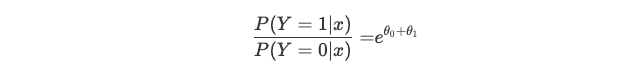
### What would be the equation in terms of theta0 + theta1.x, if class 1 and class 0 are equally likely?
#### Answer:

Given the equation: 

$$
\frac{P(Y = 1 | x)}{P(Y = 0 | x)} = e^{θ_0 + θ_1}
$$

If P(Y = 1 | x) = P(Y = 0 | x) = p, then: 

$$
\frac{p}{p} = e^{θ_0 + θ_1} \\
1 = e^{θ_0 + θ_1}
$$

Now, let's take log on both sides: 

$$
log(1) = log(e^{θ_0 + θ_1}) \\
0 = θ_0 + θ_1
$$

### Question 2.7

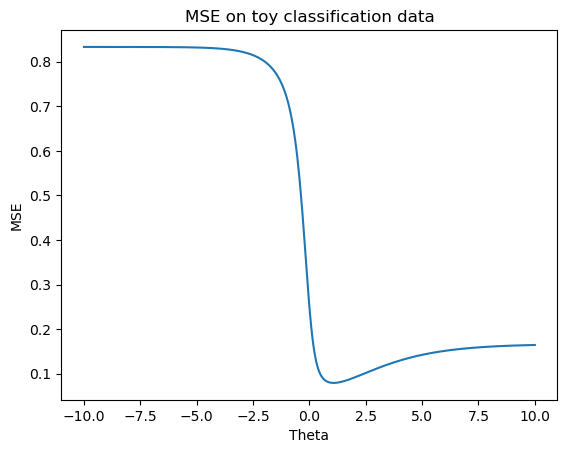

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Mean Squared Error function
def mse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Logistic regression predictions
def logistic_regression_predictions(theta, X):
    return sigmoid(X * theta)

# Toy dataset
X = np.array([-4.0, -2.0, -0.5, 1.0, 3.0, 5.0])
y = np.array([0, 0, 1, 1, 1, 1])

# Theta values to try
theta_values = np.linspace(-10, 10, 400)

# Calculate MSE for each theta
mse_values = [mse(y, logistic_regression_predictions(theta, X)) for theta in theta_values]

# Plotting
plt.plot(theta_values, mse_values)
plt.xlabel('Theta')
plt.ylabel('MSE')
plt.title('MSE on toy classification data')
plt.show()




#### Question 2.7(a): From the plot above,  what is the major pitfall of using such a loss function? Describe in terms of any saddle point and the minimum MSE value point. 

**Answer:** The major pitfall of using MSE as the loss function for logistic regression is that MSE is designed for regression tasks with convex, continous or differntiable targets and it's ability to classification problems may lead to unexpected behaviors especially due to non-convex nature. In the given plot, MSE value showcases multiple local minima and saddle points, making it challenging for algorithm to converge reliably. As a result, MSE may not guide the optimization process towards the global optimal parameter values for classification tasks. 

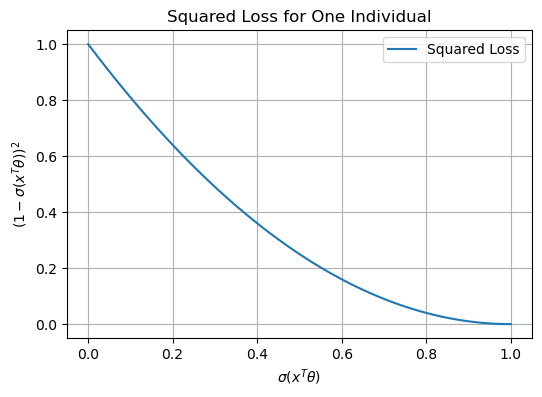

In [2]:

# Define the squared loss function
def squared_loss(y_true, y_pred):
    return (y_true - y_pred) ** 2

# Generate a range of predicted probabilities from logistic regression
predicted_probabilities = np.linspace(0, 1, 100)

# Calculate the squared loss for y_true = 1
loss_values = squared_loss(1, predicted_probabilities)

# Plotting the squared loss
plt.figure(figsize=(6, 4))
plt.plot(predicted_probabilities, loss_values, label='Squared Loss')
plt.xlabel(r'$\sigma(x^T\theta)$')
plt.ylabel(r'$(1 - \sigma(x^T\theta))^2$')
plt.title('Squared Loss for One Individual')
plt.legend()
plt.grid(True)
plt.show()


### Question 2.7(b): What is the issue with using MSE as a loss function according to the above code?

**Answer:** The issue with using MSE as a loss function in the above code is that it is not suitable for the given task which involves binary classification with logistic regression because MSE is designed for tasks with convex, continous or differntiable targets, however, in this case, the target is categorical with two values (0 and 1). Hence, applying MSE to this given problem violates this assumption and could lead to suboptimal results. 

### Question 2.8: Let y be a binary label {0,1} and p be the probability of the label being 1, then the cross-entropy loss is defined as:
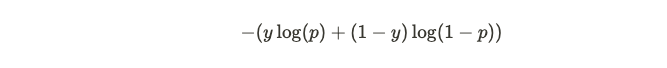

### Question 2.8 (a): what happens if y =1, (a) p = 0, (b) p = 1?
**Answer:** 

Let's analyze what happens to cross-entroy loss when y = 1: 

1. y = 1, p = 0:
\begin{split}
-(y log(p) + (1 - y) log(1 - p)) \\
-(1 log(0) + (1 - 1) log(1 - 0)) \\
-(1 ⋅ undefined + 0 ⋅ log(1)) \\
\end{split}
  
    When p = 0, log(0) is undefined and resulting into an undefined cross entropy loss. 

2. y = 1, p = 1:
\begin{split}
-(y log(p) + (1 - y) log(1 - p)) \\
-(1 log(1) + (1 - 1) log(1 - 1)) \\
-(1 ⋅ 0 + 0 ⋅ log(0)) \\
-(1 ⋅ 0 + 0 ⋅ undefined) \\
0 
\end{split}

    When p = 1, cross entropy loss is 0. 

### Question 2.8 (b): what happens if y =0, (a) p = 0, (b) p = 1?
**Answer:**

Let's analyze what happens to cross-entroy loss when y = 0: 

1. y = 0, p = 0:
\begin{split}
-(y log(p) + (1 - y) log(1 - p)) \\
-(0 log(0) + (1 - 0) log(1 - 0)) \\
-(1 ⋅ undefined + 1 ⋅ log(1)) \\
-(0 + 0) \\
0
\end{split}
  
    When p = 0, cross entropy loss is 0. 

2. y = 0, p = 1:
\begin{split}
-(y log(p) + (1 - y) log(1 - p)) \\
-(0 log(1) + (1 - 0) log(1 - 1)) \\
-(0 ⋅ 0 + 1 ⋅ log(0)) \\
-(0 ⋅ 0 + 1 ⋅ undefined) \\
\end{split}

    When p = 1, log(0) is undefined and resulting into an undefined cross entropy loss.

### Question 2.8 (c): what is the significance of negative sign? (think is terms of cross entropy vs. p(y=1))

**Answer:** The negative sign in the cross-entropy loss function directs the optimization process towards minimizing the discrepancy between the predicted labels and truth labels. Particularly in the case of y = 1, the loss term penalizes lower probabilities for class 1. The larger the deviation between the predicted and truth label, the higher the loss. This guides the model's parameter updates during training, aiming to assign higher probabilities to the true class. 


# Question 3(10 points)

You have been provided with a comprehensive dataset containing customer data collected during a recent marketing campaign. The primary objective of this assignment is to leverage machine learning techniques to predict whether a customer will respond positively (1) or negatively (0) to a promotional offer. The dataset encompasses a variety of customer attributes, including age, income, and previous purchase history.

a. Load and preprocess the dataset, preparing it for machine learning.

In [67]:
df = pd.read_csv("Assignmnet2_Question2.csv", sep = ";")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [68]:
# check if there are any null values in the data
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [69]:
# handle null values for income column 
df['Income'] = df['Income'].replace(np.nan, 0)

df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [70]:
print(df.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


b. Perform EDA on data

<Axes: >

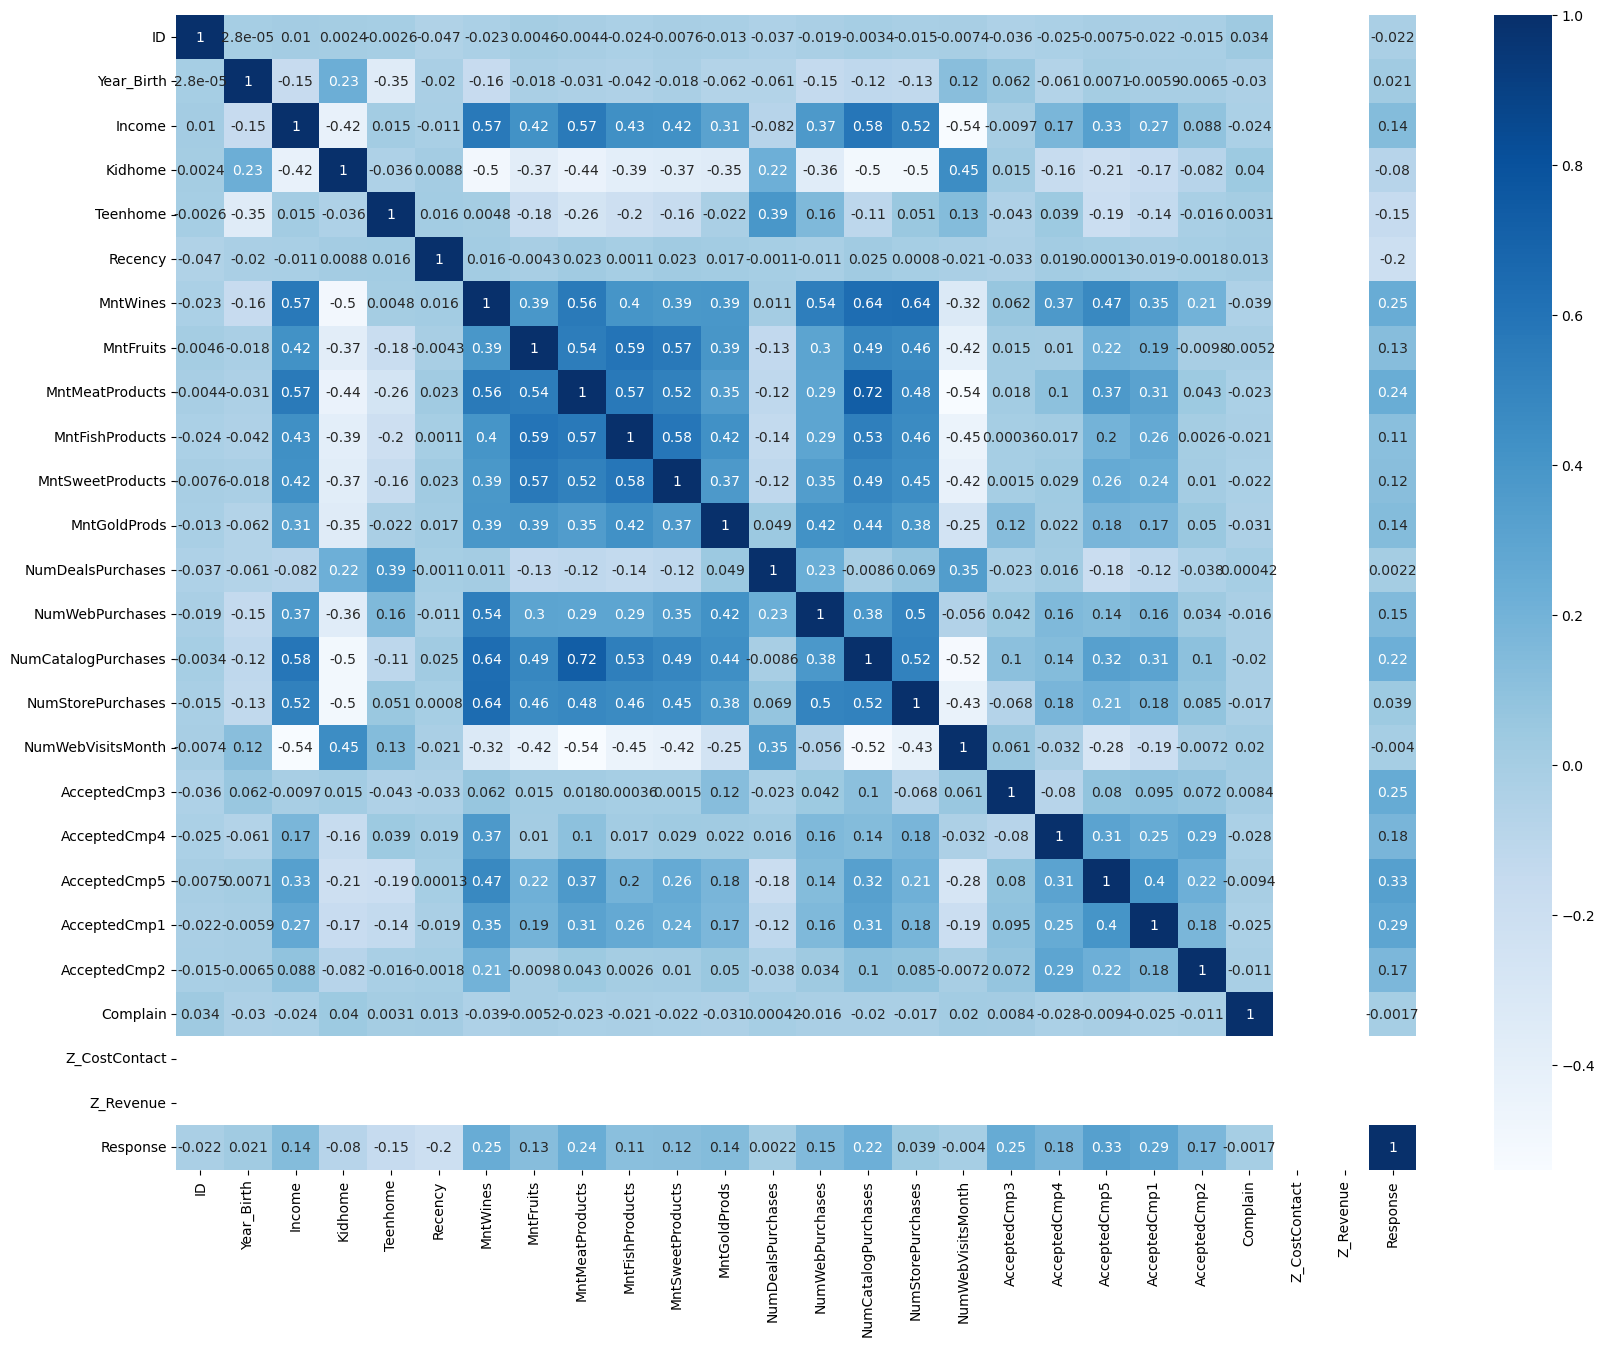

In [5]:
# heatmap to check the correlation between different variables
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only = True), cbar = True, annot = True, cmap = 'Blues')

### Positive Correlation: 
- Income - MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts 
- MntWines - MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, Income, NumCatalogPurchases

### Negative Correlation: 
- NumWebVisitsMonth - Income, NumCatalogPurchases
- Kidhome - NumCatalogPurchases, NumStorePurchases, Income

### 1. How Income affect MntWines? 

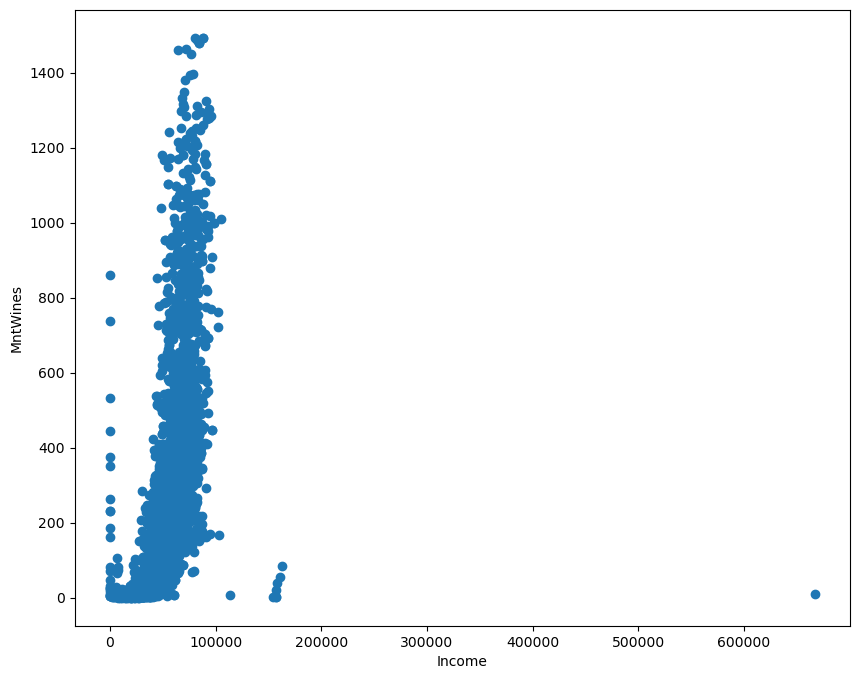

In [6]:
plt.figure(figsize = (10, 8))
plt.scatter(x = df['Income'], y = df['MntWines'])
plt.xlabel("Income")
plt.ylabel("MntWines")
plt.show()

### 2. How NumWebVisitsMonth affect NumCatalogPurchases? 

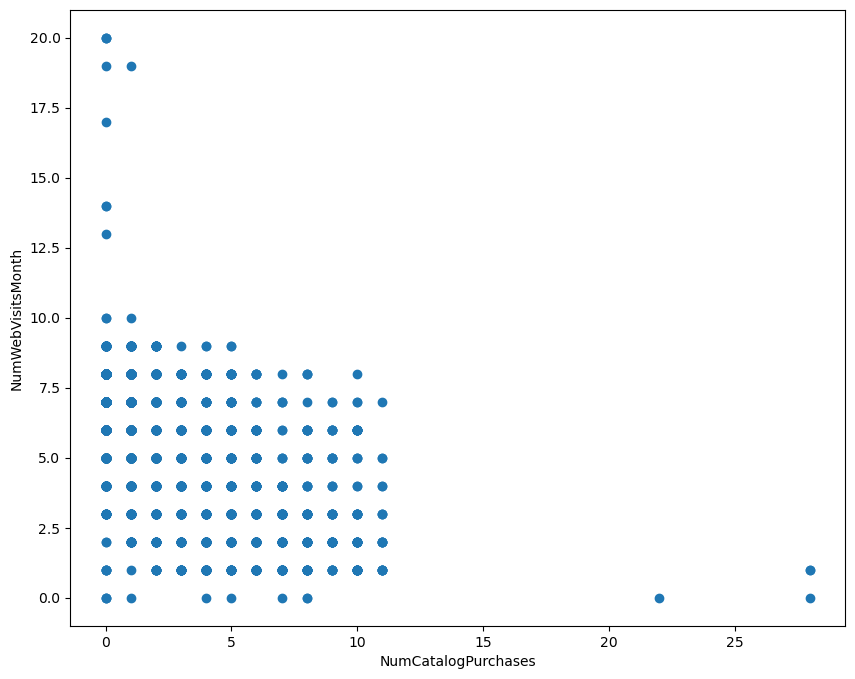

In [7]:
plt.figure(figsize = (10, 8))
plt.scatter(x = df['NumCatalogPurchases'], y = df['NumWebVisitsMonth'])
plt.xlabel("NumCatalogPurchases")
plt.ylabel("NumWebVisitsMonth")
plt.show()

### 3. Count of Education Degrees

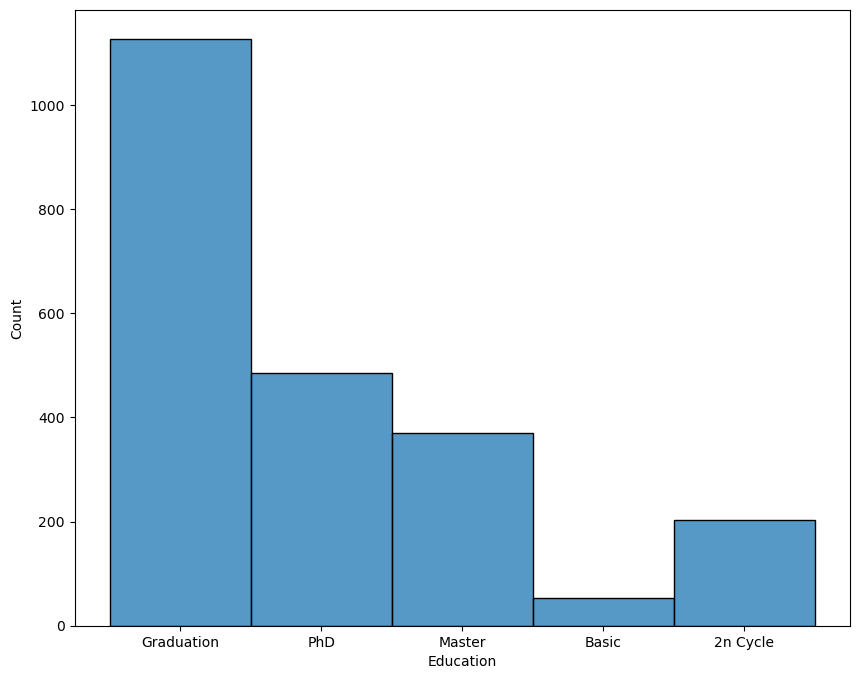

In [8]:
plt.figure(figsize = (10, 8))
sns.histplot(df['Education'])
plt.show()

### 4. How marital status affects income?

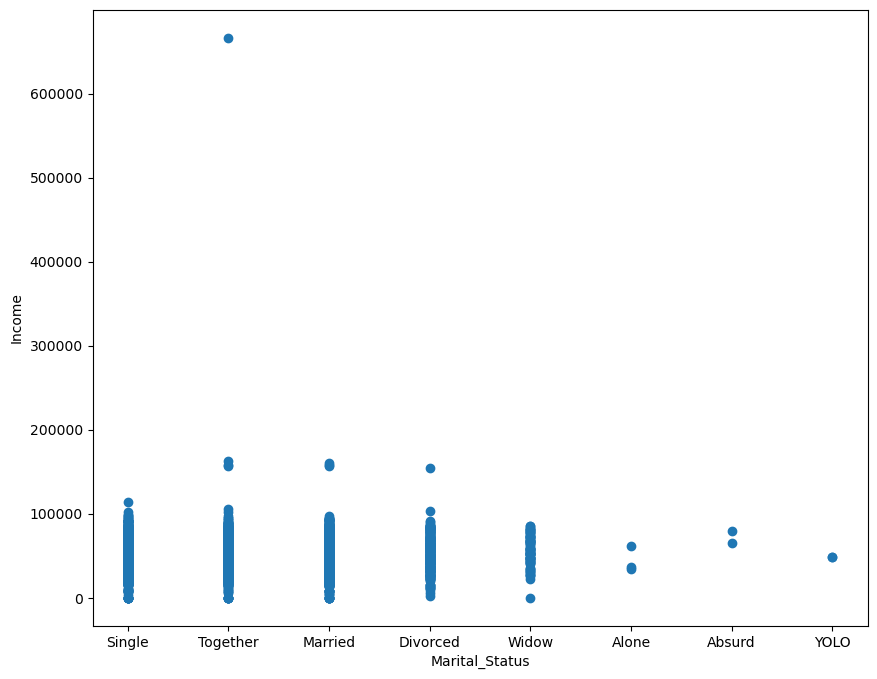

In [9]:
plt.figure(figsize = (10, 8))
plt.scatter(x = df['Marital_Status'], y = df['Income'])
plt.xlabel("Marital_Status")
plt.ylabel("Income")
plt.show()

c. Split the data into training and testing sets.

In [ ]:
# drop date customer column 
df = df.drop('Dt_Customer', axis = 1)

In [ ]:
print(df['Education'].unique())

print(df['Marital_Status'].unique())

In [81]:
# create a new df to convert categorical dtypes to one hot encoding form
df_enc = df.copy()

# create an instance of One-Hot-Encoder
enc = OneHotEncoder()

# encode the Education and Martial Status
enc_data = pd.DataFrame(enc.fit_transform(df_enc[['Education', 'Marital_Status']]).toarray(), 
                        columns = enc.get_feature_names_out())

# merge encoded data and df_enc
df_enc = df_enc.join(enc_data)

# drop Education and Marital Status column
df_enc.drop(['Education', 'Marital_Status'], axis = 1, inplace = True)

df_enc

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [184]:
X = df_enc.loc[:, df_enc.columns.difference(['ID', 'Response'])].values

y = df_enc['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [185]:
X_test

array([[   0.,    0.,    0., ..., 1982.,    3.,   11.],
       [   0.,    0.,    0., ..., 1964.,    3.,   11.],
       [   0.,    0.,    0., ..., 1984.,    3.,   11.],
       ...,
       [   0.,    0.,    0., ..., 1978.,    3.,   11.],
       [   0.,    0.,    0., ..., 1989.,    3.,   11.],
       [   0.,    0.,    0., ..., 1977.,    3.,   11.]])

In [186]:
y_test

682     0
546     1
590     1
2054    0
2147    0
       ..
1680    0
1013    0
1708    0
30      0
593     0
Name: Response, Length: 448, dtype: int64

In [192]:
# standarize the features
s = StandardScaler()

X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

d. Train both a **Perceptron model and a Logistic Regression model** on the training data to predict customer responses to the promotional offer. (Note: Implement both the models from scratch, Don't use any pretrained model)

In [199]:
class Perceptron: 
    """
        Perceptron Algorithm Class
    """
    
    def __init__(self, N, lr=0.1, epochs=50):
        """
        Initializes weights, bias, learning rate and epochs. 
        
        N: number of input features
        lr: learning rate and default value is 0.1
        epochs: number of epochs to loop over all data points, default value is 50
            
        """
        
        self.w = np.zeros(N)
        self.bias = 0
        self.lr = lr
        self.epochs = epochs
        
    def step_function(self, z):
        """
        
        Pass the combined input through activation function i.e. step 
        function. 
        
        z: represents weighted sum of inputs plus the bias term
        """
        
        return np.where(z >= 0, 1, 0)
    
    def predict(self, X):
        """
        It predicts the class labels for a given set of input data.
        
        X: a set of input data that needs to be classified
        """
        
        return self.step_function(np.dot(X, self.w) + self.bias)

        
    def fit(self, X, y):
        """
        
        Fits the perceptron model on training data and labels. 
        
        X: training data
        y: target values
        """
        
        for epoch in range(self.epochs):
            # loop over each data point 
            for x, target in zip(X, y):
                # predict the value
                y_hat = self.predict(x)
                
                if target != y_hat:
                    # calculate error 
                    error = target - y_hat
                    # update weights
                    self.w += self.lr * error * x
                    # update bias
                    self.bias += self.lr * error
                    

In [203]:
# initialize perceptron model
p = Perceptron(X.shape[1], 0.01, 100)

# train model on training data
p.fit(X_train, y_train)

# predict perceptron model on test data
y_pred_p = p.predict(X_test)

In [206]:
class LogisticRegression: 
    """
        Logistic Regression Algorithm Class
    """
    
    def __init__(self, lr=0.1, epochs=50):
        """
        Initializes weights, bias, learning rate and epochs. 
        
        lr: learning rate and default value is 0.1
        epochs: number of epochs to loop over all data points, default value is 50
            
        """
        
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.bias = None
        
    def sigmoid(self, z):
        """
        Pass the combined input through activation function i.e. sigmoid
        function to map any real valued number to a range [0,1]. 
        
        z: represents weighted sum of inputs plus the bias term
        """
        
        return 1 / (1 + np.exp(-z))
    
    def predict(self, X):
        """
        It predicts the class labels for a given set of input data.
        
        X: a set of input data that needs to be classified
        """
        
        z = np.dot(X, self.w) + self.bias
        predictions = self.sigmoid(z)
        
        return (predictions >= 0.5).astype(int)
    
    def fit(self, X, y):
        """
        
        Fits the Logistic Regression model on training data and labels. 
        
        X: training data
        y: target values
        """
        
        n_samples, n_features = X.shape
        
        # init parameters 
        self.w = np.zeros(n_features)
        self.bias = 0 
        
        for epoch in range(self.epochs):
            # forward pass 
            z = np.dot(X, self.w) + self.bias
            y_hat = self.sigmoid(z)
            
            # compute binary cross entropy loss
            epsilon = 1e-9
            y1 = y * np.log(y_hat + epsilon)
            y2 = (1 - y) * np.log(1 - y_hat + epsilon)
            bce_loss = -np.mean(y1 + y2)
            
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, y_hat - y)
            db = (1 / n_samples) * np.sum(y_hat - y)
            
            # update weights
            self.w -= self.lr * dw
            self.bias -= self.lr * db
        

In [207]:
# initialize perceptron model
lr = LogisticRegression(0.01, 150)

# train model on training data
lr.fit(X_train, y_train)

# predict logistic regression model on test data
y_pred_lr = lr.predict(X_test)

e. Evaluate the performance of both models using classification metrics such as accuracy, precision, recall, and F1-score on the testing data.

In [210]:
print('Evaluating Perceptron model on accuracy, precision, recall and F1-score: ')
print('Accuracy:', accuracy_score(y_test, y_pred_p))
print('precision:', precision_score(y_test, y_pred_p))
print('recall:', recall_score(y_test, y_pred_p))
print('F1-score:', f1_score(y_test, y_pred_p))
print(classification_report(y_test, y_pred_p))

Evaluating Perceptron model on accuracy, precision, recall and F1-score: 
Accuracy: 0.8415178571428571
precision: 0.5076923076923077
recall: 0.4583333333333333
F1-score: 0.48175182481751827
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       376
           1       0.51      0.46      0.48        72

    accuracy                           0.84       448
   macro avg       0.70      0.69      0.69       448
weighted avg       0.84      0.84      0.84       448



In [211]:
print('Evaluating Logistic Regression model on accuracy, precision, recall and F1-score: ')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('precision:', precision_score(y_test, y_pred_lr))
print('recall:', recall_score(y_test, y_pred_lr))
print('F1-score:', f1_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Evaluating Logistic Regression model on accuracy, precision, recall and F1-score: 
Accuracy: 0.8683035714285714
precision: 0.6140350877192983
recall: 0.4861111111111111
F1-score: 0.5426356589147286
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       376
           1       0.61      0.49      0.54        72

    accuracy                           0.87       448
   macro avg       0.76      0.71      0.73       448
weighted avg       0.86      0.87      0.86       448



f. Compare and contrast the performance of the Perceptron model and the Logistic Regression model. Which model performed better, and why? Discuss any differences in their decision boundaries and the interpretability of their results.

##### To evaulate the performance of the Perceptron and Logistic Regression model following metrics were utilized: 

##### 1. Accuracy: 
The Logistic Regression model has a higher accuracy of 0.86 as compared to Perceptron model of 0.84. This percentage demonstrates how many labels models successfully predicted and Logistic Regression makes correct predicitions for larger portion of dataset. 

##### 2. Precision: 
The precision is the ratio of tp / (tp / fp) where tp is the true positives and fp is the number of false positives. It provides the insights into the model's ability not to classify label as positive a sample that is negative. In this given scenario, Logistic Regression has a higher precision of 0.61 as compared to Perceptron of 0.50. 

#####  3. Recall: 
The recall is the ratio of tp / (tp / fn) where tp is the true positives and fn is the number of false negatives. It's the model's ability to correctly identify all positive samples. For the given dataset, Logistic Regression has a slightly better recall of 0.48 as compared to Perceptron of 0.45.  

#####  4. F1-score: 
F1-score metric combines both precision and recall metrics into a single value, where an F1 score reaches its best value at 1 and worst score at 0. It is calculated using the harmonic mean of precision and recall, and provides a balanced assessment of a model's performance. In this comparison, the Logistic Regression model's F1-score of 0.53 surpasses that of the Perceptron, which stands at 0.48.

Logistic Regression outperformed Perceptron across all the peformance metrics primarily due to several factors. Firstly, Logistic Regression utilizes the sigmoid function, which maps any real-valued number to a range [0,1], allowing for a flexible decision boundary capturing complex relationships between features and target variables, unlike the Perceptron's linear decision boundary. Secondly, the use of gradient descent as an optimizer function in Logistic Regression, which allows data points to converge to the optimal solution efficiently, whereas, Perceptron updates weights based on misclassified instances can lead to longer convergence times. Lastly, the ability of Logistic Regression to provide importance to each feature through the coefficients assigned to each feature, which in turn, helps the model to understand underlying relationships between features and the target variable. 

##### Decision Boundaries and Interpretability: 
The decision boundary of a Perceptron is a hyperplane that linearly separates the classes, updating the weights based on misclassified instances until convergences. On the other hand, Logistic Regression uses a sigmoid function to calculate coefficients, assigning importance to each feature. Due to the fact that Logistic Regression  provides probability scores makes it more interpretable as compared to Perceptron because it directly uses the weights and apply step function to make predications. Therefore, the probabilistic nature of Logistic Regression leads to improved interpretability and decision boundary quality.

g. Provide recommendations on when to choose one model over the other for this specific marketing campaign scenario.

Choosing a model depends on various factors such as performance, dataset characteristics, linear vs non-linear relationships, etc. However, for this given marketing campaign scenario Logistic Regression is preferable because there are features that will have non-linear relationship with customer's response and this model can deal with capturing complexities more effectively than a Perceptron's linear decision model. Additionally, having probabilities outputs and coefficients makes intrepretation easier and allows useful insights on which features are important for training. 